In [1]:
# 주택 가격 예측: 회귀분석
# 회귀분석 : 연속적인 값을 예측
# 예) 과거 기상 데이터를 입력하여 내일의 기온을 예측
# 보스턴 주택 가격 데이터셋
# 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터로
# 주택 가격 예측
# 샘플 개수 : 506개(학습용 404개, 검증용 102개)

from keras.datasets import boston_housing

# c:/사용자/본인계정/.keras/datasets 디렉토리에 다운로드됨

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [2]:
#학습용 404개, 검증용 102개, 13개의 변수

print(X_train.shape)

print(X_train.shape[1])

(404, 13)
13


In [3]:
X_test.shape

(102, 13)

In [4]:
# 독립 변수 목록

# 1. Per capita crime rate.

# 2. Proportion of residential land zoned for lots over 25,000

# square feet.

# 3. Proportion of non-retail business acres per town.

# 4. Charles River dummy variable (= 1 if tract bounds river;

# 0 otherwise).

# 5. Nitric oxides concentration (parts per 10 million).

# 6. Average number of rooms per dwelling.

# 7. Proportion of owner-occupied units built prior to 1940.

# 8. Weighted distances to five Boston employment centres.

# 9. Index of accessibility to radial highways.

# 10. Full-value property-tax rate per $10,000.

# 11. Pupil-teacher ratio by town.

# 12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of

# Black people by town.

# 13. % lower status of the population.

# 종속변수 : 주택의 가격(천달러 단위)

#주택가격(10000~50000달러, 1970년대 중반 가격)

y_train[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

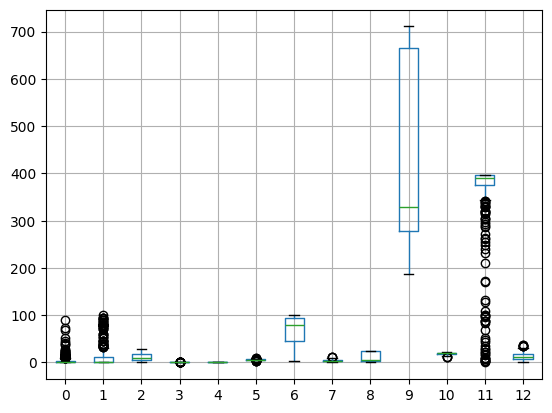

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(X_train).boxplot()
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

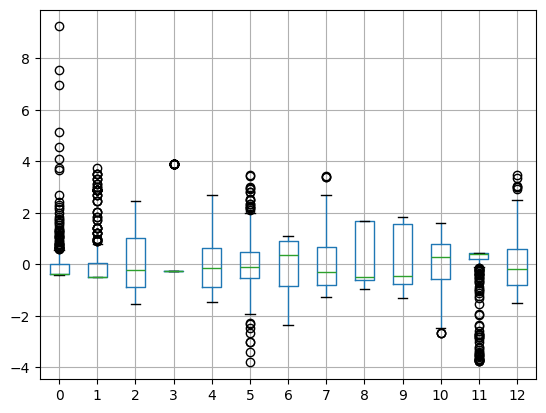

In [7]:
pd.DataFrame(X_train_scaled).boxplot()
plt.show()

In [8]:
# 활성화 함수 : 입력데이터를 적절하게 처리하여 출력데이터를 만들어내는 함수

# input data -> {activation function} -> output data

# 활성화 함수의 종류 : 탄젠트(thanh) 함수, 시그모이드(sigmoid) 함수, ReLU 함수

# 탄젠트 함수나 시그모이드 함수보다 학습시간이 빨라서

# 최근에는 ReLU(Rectified Linear Unit)가 많이 사용되고 있음

from keras import models, layers

# 64개의 노드를 가진 은닉층 2개의 신경망

def build_model():
    model = models.Sequential()

    #relu
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))

    # 출력층(1개의 노드, 하나의 값을 예측하는 회귀분석의 경우
    # 활성화 함수가 없는 선형층을 사용함)

    model.add(layers.Dense(1))

    # mse 손실 함수를 사용하여 컴파일
    # mse : 평균 제곱 오차(mean squared error), 예측값과 실제값의 거리의 제곱
    # mae : 평균 절대 오차, 예측값과 실제값의 거리의 절대값
    # metrics : 평가지표, 검증용 데이터셋으로 평가하는 기준

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()
model.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

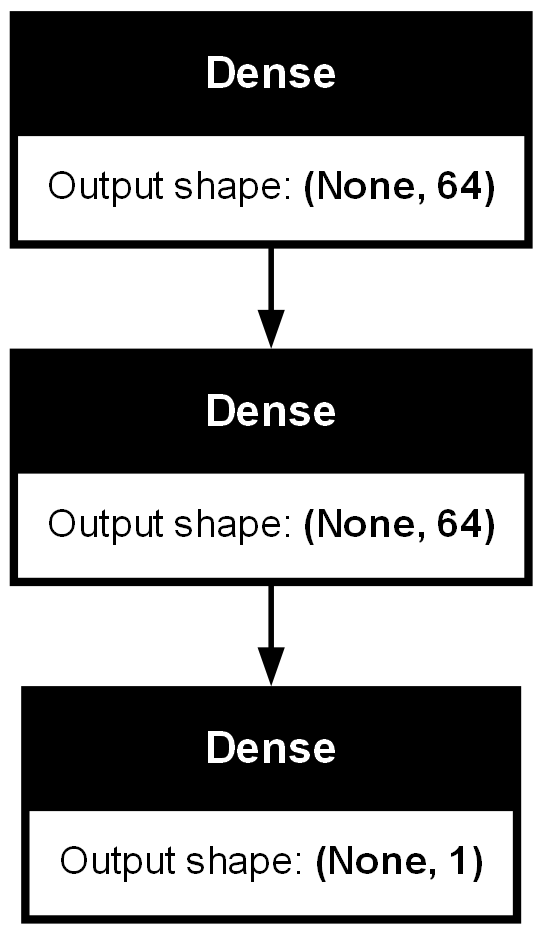

In [9]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [10]:
import matplotlib.pyplot as plt
import numpy as np 

def train(x_train, y_train, epochs=21):
    for epoch in np.arange(1, epochs):
      hist=model.fit(x_train, y_train)
      plt.plot(y_train, c='r', label='real')
      plt.plot(model.predict(x_train), c='b', label='pred')
      plt.legend()
      mae=hist.history['mae'][0]
      plt.title(f"Epoch {epoch:02d}, mae {mae:.2f}")
      plt.savefig(f"C:/work/vsCode/7.tensorflow-keras/img/plot_{epoch:02d}.png")
      plt.clf()

In [11]:
import os
print(os.getcwd())

c:\work\vsCode\7.tensorflow-keras


In [12]:
train(X_train_scaled, y_train)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 569.2087 - mae: 22.0512  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 427.5363 - mae: 18.9468
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 316.0953 - mae: 15.6511
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 198.9286 - mae: 12.0035
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 111.5128 - mae: 8.1512
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 75.3372 - mae: 6.1349
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 58.9403 - mae: 5.3791
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 42.1494 - mae: 4.6117
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 32.8341 - mae: 3.9033
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 0s

In [13]:
import cv2

import glob


img_array=[]

size=(0,0)

for filename in  sorted(glob.glob('img/*.png')):

    img=cv2.imread(filename)

    height,width,layers=img.shape

    size=(width,height)

    img_array.append(img)

out=cv2.VideoWriter('model.mp4', cv2.VideoWriter_fourcc(*'H264'), 0.5, size)

for i in range(len(img_array)):

    out.write(img_array[i])



out.release()

In [14]:
hist=model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.3765 - mae: 2.5983  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 11.3949 - mae: 2.3619  
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 12.4866 - mae: 2.4584 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 12.3288 - mae: 2.4459  
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3017 - mae: 2.3647 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.5047 - mae: 2.4660
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 9.7382 - mae: 2.2269  
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 12.2694 - mae: 2.4324  
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 11.6388 - mae: 2.4231  
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 9.7154 - mae: 2.3221   
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 12.7630 - mae: 2.5532  
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.1707 - mae: 2.3943 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0

In [15]:
# 검증용 데이터로 모델 평가

mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)

print(mse)

print(mae) 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.9756 - mae: 2.7685 
34.170997619628906
2.9408109188079834


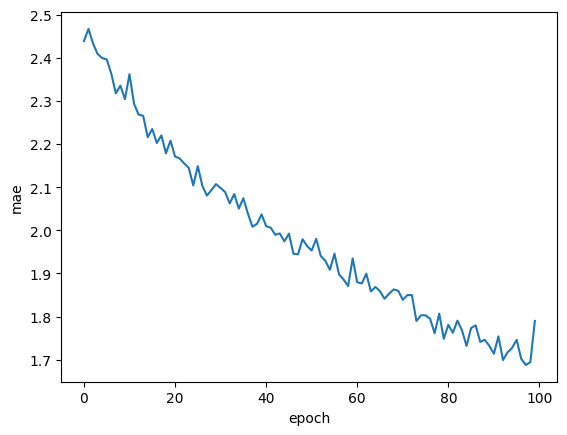

In [16]:
plt.plot(hist.history["mae"])

plt.ylabel("mae")

plt.xlabel("epoch")

plt.show()